In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

--2022-10-25 22:10:31--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8001::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘AER_credit_card_data.csv’

AER_credit_card_dat 100%[===================>]  71,53K  --.-KB/s    in 0,02s   

2022-10-25 22:10:31 (4,35 MB/s) - ‘AER_credit_card_data.csv’ saved [73250/73250]



## Data preparation

In [2]:
import pandas as pd

In [3]:
credit_card_df = pd.read_csv("AER_credit_card_data.csv")

In [4]:
credit_card_df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [6]:
for col in credit_card_df.columns:
    print(f"{col}:\n")
    print(credit_card_df[col].value_counts())
    print("---")

card:

yes    1023
no      296
Name: card, dtype: int64
---
reports:

0     1060
1      137
2       50
3       24
4       17
5       11
7        6
6        5
11       4
9        2
12       1
14       1
10       1
Name: reports, dtype: int64
---
age:

28.16667    13
25.16667    11
23.83333    11
25.33333    10
25.41667    10
            ..
43.41667     1
42.25000     1
51.83333     1
45.50000     1
58.08333     1
Name: age, Length: 418, dtype: int64
---
income:

3.0000     61
2.5000     46
2.0000     44
3.5000     41
4.0000     32
           ..
1.6380      1
4.3500      1
2.2750      1
12.4999     1
3.1920      1
Name: income, Length: 431, dtype: int64
---
share:

0.000480    12
0.000600    11
0.000667    11
0.000400    11
0.000462    10
            ..
0.024458     1
0.008602     1
0.090640     1
0.003312     1
0.111619     1
Name: share, Length: 1162, dtype: int64
---
expenditure:

0.000000      317
4.583333        9
8.333333        8
7.083333        5
37.583330       2
             ..

In [7]:
mapper = {"yes": 1, 
          "no": 0}

credit_card_df["card"] = credit_card_df["card"].map(mapper)
credit_card_df["owner"] = credit_card_df["owner"].map(mapper)
credit_card_df["selfemp"] = credit_card_df["selfemp"].map(mapper)

In [8]:
credit_card_df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


## Spliting the data into train, val and test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
full_train_df, test_df = train_test_split(credit_card_df, test_size=0.2,
                                         random_state=1)

In [12]:
full_train_df.shape, test_df.shape

((1055, 12), (264, 12))

In [13]:
0.2 / 0.8

0.25

In [14]:
train_df, val_df = train_test_split(full_train_df, test_size=0.25,
                                         random_state=1)

In [15]:
train_df.shape, val_df.shape

((791, 12), (264, 12))

In [16]:
y_full_train = full_train_df.card

del full_train_df["card"]

y_train = train_df.card
y_val = val_df.card
y_test = test_df.card

del train_df["card"]
del val_df["card"]
del test_df["card"]

## ROC AUC used to evaluate feature importance of numerical variables

In [17]:
from sklearn.metrics import roc_auc_score

In [19]:
train_df.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1105,3,40.50000,4.0128,0.000299,0.00000,0,0,1,12,1,17
431,1,32.33333,6.0000,0.000200,0.00000,1,0,4,18,1,4
407,1,29.16667,2.2000,0.038205,69.79333,0,0,0,49,1,7
1217,1,54.66667,7.2900,0.106536,647.20670,1,0,2,78,1,9
1133,0,25.00000,3.3984,0.000353,0.00000,1,0,2,29,0,4


In [22]:
train_df.dtypes

reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner            int64
selfemp          int64
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [20]:
train_df.columns

Index(['reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp',
       'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [23]:
numerical_features_lst = ['reports', 'age', 'income', 'share', 'expenditure',
                          'dependents', 'months', 'majorcards', 'active']

categorical_features_lst = ['owner', 'selfemp']

#### Question 1

In [24]:
for feature in numerical_features_lst:
    auc = roc_auc_score(y_train, train_df[feature])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -train_df[feature])
    print('%9s, %.3f' % (feature, auc))



  reports, 0.717
      age, 0.524
   income, 0.591
    share, 0.989
expenditure, 0.991
dependents, 0.533
   months, 0.529
majorcards, 0.534
   active, 0.604


## Training the model

### Applying DictVectorizer

In [25]:
features_lst = ["reports", "age", "income", "share", "expenditure", 
                "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [27]:
train_dict = train_df[features_lst].to_dict(orient="records")

In [28]:
from sklearn.feature_extraction import DictVectorizer

In [29]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dict)

In [30]:
def X_transformations(dataframe):
    features_lst = ["reports", "age", "income", "share", "expenditure", 
                    "dependents", "months", "majorcards", "active", "owner", "selfemp"]
    X_dict = dataframe[features_lst].to_dict(orient="records")
    X = dv.transform(X_dict)
    
    return X

X_val = X_transformations(val_df)
X_test = X_transformations(test_df)

### Training Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [46]:
# prob for 0 and 1
y_pred = lr.predict_proba(X_val)[:, 1]

y_pred = (y_pred >= 0.5).astype('int')

#### Question 2

In [48]:
auc = roc_auc_score(y_val, y_pred).round(3)
auc

0.974

In [68]:
import numpy as np

def score_df(y_val, y_pred):
    scores = []
    
    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
        
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_pos = (y_pred >= t)
        predict_neg = (y_pred < t)
        
        tp = (actual_positive & predict_pos).sum()
        tn = (actual_negative & predict_neg).sum()
        
        fp = (predict_pos & actual_negative).sum()
        fn = (predict_neg & actual_positive).sum()
        
        scores.append((t, tp, tn, fp, fn))
        
    scores_df = pd.DataFrame(scores, columns=["t", "tp", "tn", "fp", "fn"])
    
    # used when having false positives is worse
    scores_df["precision"] = scores_df["tp"] / (scores_df["tp"] + scores_df["fp"])
    
    # used when having false negatives is worse
    scores_df["recall"] = scores_df["tp"] / (scores_df["tp"] + scores_df["fn"])
    
    return scores_df

In [69]:
scores_df = score_df(y_val, y_pred)

In [72]:
scores_df[::10]

,t,tp,tn,fp,fn,precision,recall
0,0.0,211,0,53,0,0.799242,1.000000
10,0.1,204,52,1,7,0.995122,0.966825
20,0.2,204,52,1,7,0.995122,0.966825
30,0.3,204,52,1,7,0.995122,0.966825
40,0.4,204,52,1,7,0.995122,0.966825
50,0.5,204,52,1,7,0.995122,0.966825
60,0.6,204,52,1,7,0.995122,0.966825
70,0.7,204,52,1,7,0.995122,0.966825
80,0.8,204,52,1,7,0.995122,0.966825
90,0.9,204,52,1,7,0.995122,0.966825


In [66]:
import matplotlib.pyplot as plt

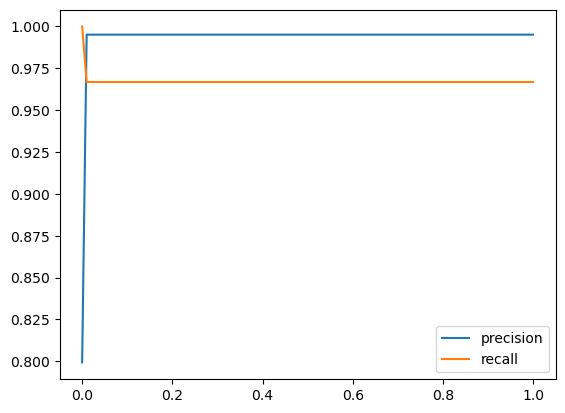

In [71]:
plt.plot(scores_df.t, scores_df.precision, label='precision')
plt.plot(scores_df.t, scores_df.recall, label='recall')

plt.legend()
plt.show()